In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display



## *Final project-Mumbai Restaurants Trip Advisor Dataset*

קישור למקור ממנו לקחנו את הנתונים: "https://www.kaggle.com/datasets/adrianmcmahon/mumbai-restaurants-trip-advisor-dataset"

קישור למקור ממנו קאגל לקחו את הנתונים: " https://tripadvisor.com "

## Group-17 

## participants :
* Marin Ben Hamo 
* Liat Mazal Hallal



<div>
<img src="https://github.com/LiatHallal/T.A-project-/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%201.png?raw=true" = height = "20"/>
</div>



<div dir="rtl"> 

####   במסגרת הפרויקט, נבחן את המשקל של מגוון גורמים המשפיעים על בחירת בעל עסק לפתוח מסעדה מצליחה במומבאי  

In [2]:
url = 'https://raw.githubusercontent.com/LiatHallal/T.A-project-/main/tripadvisor.csv'
india_df = pd.read_csv(url)
india_df.head()

,name,address,Phone,price_range_from,price_range_to,cuisines,rating,review_count,excellent_count,very_good_count,average_count,poor_count,terrible_count
0,1 Tablespoon,"23, Ram Villa, Opposite Sahkari Bhandar, Matun...",+91 22 2403 3441,NaN,NaN,"Pizza, Fast food",4.0,31.0,9.0,15.0,4.0,2.0,1.0
1,10th Street Cafe,"Khar Pali Road, Road No 10, Khar Shop No 3 & 4...",+91 87790 92308,NaN,NaN,"Italian, Cafe",4.5,18.0,8.0,8.0,2.0,0.0,0.0
2,10th Street Cafe,"10th Road , Shop No 8 , Sukhmani Himalaya Coop...",+91 22 2628 2826,NaN,NaN,"Italian, Mexican, American, Cafe, Eastern Euro...",4.0,7.0,3.0,3.0,0.0,0.0,1.0
3,1441 Pizzeria,"Raj Infinia, Evershine Nagar Malad West Near M...",+91 80970 81441,245.0,645.0,"Italian, Pizza, Fast food",4.5,68.0,51.0,16.0,1.0,0.0,0.0
4,1441 Pizzeria,"Senapati Bapat Road, Mumbai 400053 India",+91 84549 14411,245.0,745.0,"Pizza, Italian",4.5,40.0,23.0,16.0,1.0,0.0,0.0



<div dir="rtl"> 

#### *שם המסעדה - עמודה המייצגת את שם המסעדה במומבאי*
#### *כתובת המסעדה - עמודה המייצגת את כתובת המסעדה כולל מדינה, עיר, שכונה, רחוב, מיקוד*
#### *מספר טלפון סלולרי - עמודה המייצגת את מספר הטלפון הסלולרי של המסעדה*
#### *המחיר הנמוך ביותר - עמודה המייצגת את מחיר המנה הזולה במסעדה*
#### *המחיר הגבוה ביותר - עמודה המייצגת את מחיר המנה היקרה ביותר במסעדה*
#### *מטבחים - עמודה המייצגת את סגנון המטבח של המסעדה*
#### *דירוג - עמודה המייצגת את הדירוג הממוצע של המסעדה ,הדירוגים הם בטווח של 3.5-5.0*
#### *כמות הביקורות - עמודה המייצגת את כמות הביקורות על המסעדה*
#### *ביקורות מצוינות - עמודה המייצגת את כמות הביקורות המעולות על המסעדה*
#### *ביקורות טובות מאוד - עמודה המייצגת את כמות הביקורות הטובות מאוד על המסעדה*
#### *ביקורות ממוצעות - עמודה המייצגת את כמות הביקורות הממוצעות על המסעדה*
#### *ביקורות גרועות - עמודה המייצגת את כמות הביקורות הדלות על המסעדה*
#### *ביקורות איומות - כמות התגובות הנוראיות על המסעדה*

<div dir="rtl"> 

### סידור הדאטה :

In [3]:
india_df.isnull().sum().sort_values()

name                   6
address                6
rating                 6
review_count           6
excellent_count        6
very_good_count        6
average_count          6
poor_count             6
terrible_count         6
Phone                140
cuisines             554
price_range_from    2615
price_range_to      2615
dtype: int64

In [4]:
india_df.shape

(3001, 13)

In [5]:
india_df.columns

Index(['name', 'address', 'Phone', 'price_range_from', 'price_range_to',
       'cuisines', 'rating', 'review_count', 'excellent_count',
       'very_good_count', 'average_count', 'poor_count', 'terrible_count'],
      dtype='object')

In [6]:
india_df.dtypes

name                 object
address              object
Phone                object
price_range_from    float64
price_range_to      float64
cuisines             object
rating              float64
review_count        float64
excellent_count     float64
very_good_count     float64
average_count       float64
poor_count          float64
terrible_count      float64
dtype: object

<div dir="rtl"> 

### *החלטנו להסיר את עמודות המחירים מהדאטה פריים, משום שהיו כמות גדולה של ערכים חסרים באותן עמודות, ובגלל זה קשה להשתמש בהם כמקור נתונים אמין*

In [7]:
india_df = india_df.drop(['price_range_from', 'price_range_to'], axis=1)
india_df.head()

,name,address,Phone,cuisines,rating,review_count,excellent_count,very_good_count,average_count,poor_count,terrible_count
0,1 Tablespoon,"23, Ram Villa, Opposite Sahkari Bhandar, Matun...",+91 22 2403 3441,"Pizza, Fast food",4.0,31.0,9.0,15.0,4.0,2.0,1.0
1,10th Street Cafe,"Khar Pali Road, Road No 10, Khar Shop No 3 & 4...",+91 87790 92308,"Italian, Cafe",4.5,18.0,8.0,8.0,2.0,0.0,0.0
2,10th Street Cafe,"10th Road , Shop No 8 , Sukhmani Himalaya Coop...",+91 22 2628 2826,"Italian, Mexican, American, Cafe, Eastern Euro...",4.0,7.0,3.0,3.0,0.0,0.0,1.0
3,1441 Pizzeria,"Raj Infinia, Evershine Nagar Malad West Near M...",+91 80970 81441,"Italian, Pizza, Fast food",4.5,68.0,51.0,16.0,1.0,0.0,0.0
4,1441 Pizzeria,"Senapati Bapat Road, Mumbai 400053 India",+91 84549 14411,"Pizza, Italian",4.5,40.0,23.0,16.0,1.0,0.0,0.0


In [8]:
#בדקנו האם כל הערכים החסרים נמצאים באותה שורה ואם השורה מכילה יותר מ-5 ערכים חסרים נרצה להסיר את השורות
def count_rows_with_empty_values(df, threshold):
    num_empty_values=df.isnull().sum(axis=1)
    rows_with_empty_values=(num_empty_values>threshold).sum()
    return rows_with_empty_values

In [9]:
count_rows_with_empty_values(india_df,5)
india_df=india_df.dropna(thresh=5)


In [10]:
india_df.isnull().sum().sort_values()

name                 0
address              0
rating               0
review_count         0
excellent_count      0
very_good_count      0
average_count        0
poor_count           0
terrible_count       0
Phone              134
cuisines           548
dtype: int64

In [11]:
dummies = india_df['cuisines'].str.get_dummies(sep=', ')

In [12]:
df_cuisines = pd.concat([india_df, dummies], axis=1)
df_cuisines = df_cuisines.drop(['Bar', 'Barbecue', 'Brew Pub', 'Cafe', 'Contemporary', 'Deli', 'Diner', 'Dining bars', 'Fast food', 'Fusion', 'Gastropub', 'Gluten Free Options', 'Grill', 'Healthy', 'Pub', 'Seafood', 'Soups', 'Sports bars', 'Steakhouse', 'Street Food', 'Vegan Options', 'Vegetarian Friendly', 'Wine Bar', 'International'], axis=1)

<div dir="rtl"> 
    
#### המטרה היא לאחד (לסכם) מספר סוגים שונים של מטבחים לתוך עמודה אחת:







In [13]:
merge_cuisines = df_cuisines['American'] + df_cuisines['Central American'] + df_cuisines['Cajun & Creole'] + df_cuisines['Southwestern']
df_cuisines['American1'] = merge_cuisines
df_cuisines['American']=df_cuisines['American1']

#עשינו יוניק כדי לבדוק אם החיבור של כל המסעדות הקשורות לאמריקה יהיה 0 או 1 ומה שלא יהיה 0 או 1 נעשה עליו ריפלייס 
df_cuisines['American1'] = df_cuisines.American1.replace((2), 1)


merge_cuisines = df_cuisines['Central-Italian'] + df_cuisines['Italian'] + df_cuisines['Northern-Italian'] + df_cuisines['Pizza'] + df_cuisines['Southern-Italian']
df_cuisines['Italian1'] = merge_cuisines
#df_cuisines['Italian1'].unique()
df_cuisines['Italian1'] = df_cuisines.Italian1.replace((3,2), 1)


merge_cuisines = df_cuisines['Japanese'] + df_cuisines['Sushi']
df_cuisines['Japanese1'] = merge_cuisines
#df_cuisines['Japanese1'].unique()
df_cuisines['Japanese1'] = df_cuisines.Japanese1.replace(2, 1)


merge_cuisines = df_cuisines['Central European'] + df_cuisines['European']
df_cuisines['European1'] = merge_cuisines
#df_cuisines['European1'].unique()
df_cuisines['European1'] = df_cuisines.European1.replace(2, 1)


df_cuisines = df_cuisines.drop(['American', 'Central American', 'Cajun & Creole', 'Southwestern', 'Central-Italian', 'Italian', 'Northern-Italian', 'Pizza', 'Southern-Italian', 'Japanese', 'Sushi', 'Asian', 'Central Asian', 'Central European', 'European'], axis=1)
df_cuisines = df_cuisines.rename(columns = {'American1': 'American', 'Italian1': 'Italian', 'Japanese1': 'Japanese', 'European1': 'European'})

In [14]:
df_cuisines.columns

Index(['name', 'address', 'Phone', 'cuisines', 'rating', 'review_count',
       'excellent_count', 'very_good_count', 'average_count', 'poor_count',
       'terrible_count', 'Afghani', 'African', 'Arabic', 'Armenian',
       'Azerbaijani', 'Balti', 'Brazilian', 'British', 'Burmese', 'Caribbean',
       'Chilean', 'Chinese', 'Eastern European', 'Egyptian', 'French',
       'German', 'Greek', 'Indian', 'Indonesian', 'Irish', 'Israeli',
       'Jamaican', 'Korean', 'Latin', 'Lebanese', 'Malaysian', 'Mediterranean',
       'Mexican', 'Middle Eastern', 'Mongolian', 'Moroccan', 'Nepalese',
       'Pakistani', 'Persian', 'Peruvian', 'Philippine', 'Polynesian',
       'Portuguese', 'Singaporean', 'South American', 'Spanish', 'Sri Lankan',
       'Thai', 'Tibetan', 'Turkish', 'Vietnamese', 'American', 'Italian',
       'Japanese', 'European'],
      dtype='object')

<div dir="rtl"> 
    
#### בקוד זה, ייבאנו מידע על המיקום של המסעדות מכתובתן, ונפרק את המיקודים מתוך הכתובות לצורך השוואה וניתוח נתונים. לאחר מכן, נוסיף עמודה נוספת בשם "מיקודים" למסגרת הדרך בה נוכל להשתמש במידע הזה במהלך המחקר ובהגעתנו למסקנות. 

In [15]:
l2 = []
for i in range(len(df_cuisines)-1):
    split_result = df_cuisines['address'][i].split(' ')
    if len(split_result) >= 2:
        l2.append(split_result[-2])

In [16]:
df_cuisines['zip_code'] = df_cuisines['address'].apply(lambda x: x.split(' ')[-2] if len(x.split(' ')) >= 2 else None)

In [17]:
df_cuisines = df_cuisines[['name', 'address', 'zip_code', 'Phone', 'cuisines', 'rating', 'review_count',
                            'excellent_count', 'very_good_count', 'average_count', 'poor_count', 'terrible_count',
                            'Afghani', 'African', 'Arabic', 'Armenian', 'Azerbaijani', 'Balti', 'Brazilian', 'British',
                            'Burmese', 'Caribbean', 'Chilean', 'Chinese', 'Eastern European', 'Egyptian', 'French',
                            'German', 'Greek', 'Indian', 'Indonesian', 'Irish', 'Israeli', 'Jamaican', 'Korean', 'Latin',
                            'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mongolian', 'Moroccan',
                            'Nepalese', 'Pakistani', 'Persian', 'Peruvian', 'Philippine', 'Polynesian', 'Portuguese',
                            'Singaporean', 'South American', 'Spanish', 'Sri Lankan', 'Thai', 'Tibetan', 'Turkish',
                            'Vietnamese', 'American', 'Italian', 'Japanese', 'European']]

In [18]:
df_cuisines

,name,address,zip_code,Phone,cuisines,rating,review_count,excellent_count,very_good_count,average_count,...,Spanish,Sri Lankan,Thai,Tibetan,Turkish,Vietnamese,American,Italian,Japanese,European
0,1 Tablespoon,"23, Ram Villa, Opposite Sahkari Bhandar, Matun...",400019,+91 22 2403 3441,"Pizza, Fast food",4.0,31.0,9.0,15.0,4.0,...,0,0,0,0,0,0,0,1,0,0
1,10th Street Cafe,"Khar Pali Road, Road No 10, Khar Shop No 3 & 4...",400049,+91 87790 92308,"Italian, Cafe",4.5,18.0,8.0,8.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2,10th Street Cafe,"10th Road , Shop No 8 , Sukhmani Himalaya Coop...",400049,+91 22 2628 2826,"Italian, Mexican, American, Cafe, Eastern Euro...",4.0,7.0,3.0,3.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,1441 Pizzeria,"Raj Infinia, Evershine Nagar Malad West Near M...",400064,+91 80970 81441,"Italian, Pizza, Fast food",4.5,68.0,51.0,16.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,1441 Pizzeria,"Senapati Bapat Road, Mumbai 400053 India",400053,+91 84549 14411,"Pizza, Italian",4.5,40.0,23.0,16.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,Zoobar,"Vile Parle West Liberty Lodge, 1st Floor, DJ M...",400056,+91 73039 66227,"Bar, Pub",4.0,27.0,8.0,15.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2991,Zoodles,"3rd Floor, Oberoi Mall, Off Western Express Hi...",400063,+91 80808 04040,"Chinese, Asian, Fast food",4.0,16.0,4.0,7.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2992,zoodles,4 - 5 Meghraj Cooperative Housing Society Grou...,400060,+91 22 2630 0000,"Chinese, Asian",4.0,28.0,10.0,9.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2993,Zouk Lounge & Kitchen,"45 Telly Park Road Hotel Imperial Palac, Mumba...",400069,+91 93206 20947,"Indian, Bar, Pub",3.5,20.0,3.0,7.0,8.0,...,0,0,0,0,0,0,0,0,0,0


<div dir="rtl"> 

### הצגת הדאטה בצורה ויזואלית  :

<div dir="rtl"> 
    
####   בדיקת  התפלגות הערכים וזיהוי ערכים חריגים או עמוסים יתר באופן ויזואלי על סוגי הביקורות :
    

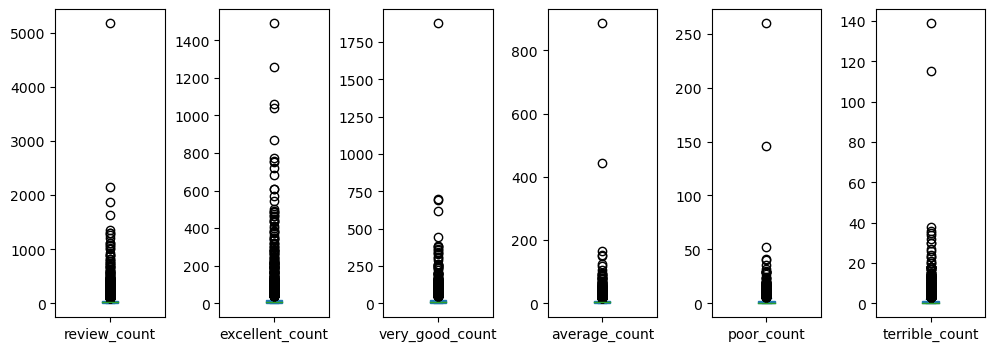

In [19]:
columns_of_interest = ['review_count','excellent_count', 'very_good_count', 'average_count', 'poor_count', 'terrible_count']
Reasonable_Range= df_cuisines.filter(columns_of_interest).select_dtypes(include=np.number)


Reasonable_Range.plot(subplots=True, layout=(1, len(columns_of_interest)), kind='box', figsize=(12, 4), patch_artist=True)
plt.subplots_adjust(wspace=0.5)
plt.show()


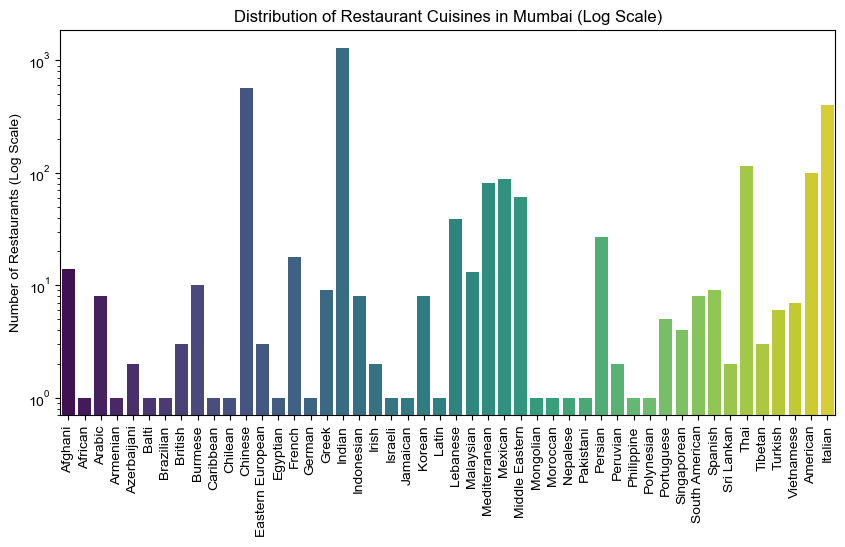

In [20]:
categories_C = ['Afghani', 'African', 'Arabic', 'Armenian', 'Azerbaijani', 'Balti', 'Brazilian', 'British', 'Burmese', 'Caribbean',
              'Chilean', 'Chinese', 'Eastern European', 'Egyptian', 'French', 'German', 'Greek', 'Indian', 'Indonesian', 'Irish',
              'Israeli', 'Jamaican', 'Korean', 'Latin', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Middle Eastern',
              'Mongolian', 'Moroccan', 'Nepalese', 'Pakistani', 'Persian', 'Peruvian', 'Philippine', 'Polynesian', 'Portuguese',
              'Singaporean', 'South American', 'Spanish', 'Sri Lankan', 'Thai', 'Tibetan', 'Turkish', 'Vietnamese', 'American',
              'Italian']
category_counts = [df_cuisines[category].sum() for category in categories_C]


green_colors = sns.color_palette("viridis", len(categories_C))

plt.figure(figsize=(10, 5))
sns.barplot(x=categories_C, y=category_counts, palette=green_colors)
sns.set(style="whitegrid")  
plt.title('Distribution of Restaurant Cuisines in Mumbai (Log Scale)')

plt.ylabel('Number of Restaurants (Log Scale)')
plt.xticks(rotation=90)
plt.yscale('log')  
plt.show()

<div dir="rtl">

#### בגרף זה מוצגים כל סוגי המטבחים של המסעדות במומבאי והכמות מכל סוג מטבח . הכמויות מוצגות בסולם לוגריתמי לטובת ייצוג ויזואלי טוב. 

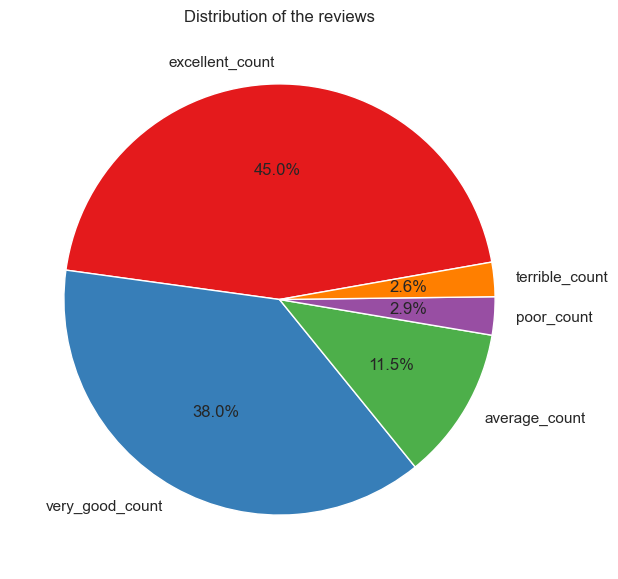

In [21]:
categories_r = [ 'excellent_count', 'very_good_count', 'average_count', 'poor_count', 'terrible_count']
category_counts = [df_cuisines[category].sum() for category in categories_r]


colors = sns.color_palette("Set1", len(categories_r))
plt.figure(figsize=(7,7))
plt.pie(category_counts, labels=categories_r, autopct='%1.1f%%', startangle=10, colors=colors)
plt.title('Distribution of the reviews')
plt.show()


<div dir="rtl">  

#### בניסיון להבין את ההבחנה בין אחוז המדרגים המצויינים (45% מכלל המדרגים) לבין השאלה למה אנשים נוטים לתת דירוג חיובי, נעסוק במגוון של סיבות שעשויות להשפיע על התרבות דירוגים במסעדות
#### הסיבות :
##### 1. אי נעימות לדרג באופן שלילי - יתכן ואנשים מרגישים יותר אי נעימות לביצוע דירוג שלילי. הם יתקשו להעניש מסעדות ועסקים וחלקם יעדיפו להתעלם מהדירוג במקום להביע חוויות שליליות  
##### 2. שת"פ והשפעה של העסק - ישנה אפשרות שבעלי העסקים עושים שת"פ עם הלקוחות תמורת ביקורות טובות/מצויינות
##### 3.תרבות חיובית בהתמקדות בחוויות טובות- תרבות הצרכנים עשויה להעדיף לשתף חוויות טובות ולהתרכז בחיוביות. זה עשוי להוביל לכך שהדירוגים יהיו יותר חיוביים מאשר שליליים
##### 4.הימנעות ממילוי דירוג שלילי - לקוחות מעדיפים להתרחק מדירוגים שליליים ולא לחזור למסעדה במקרה שלא נהנו , אך בכל זאת לא מעוניינים להשפיע על קהל הצופים.   
   

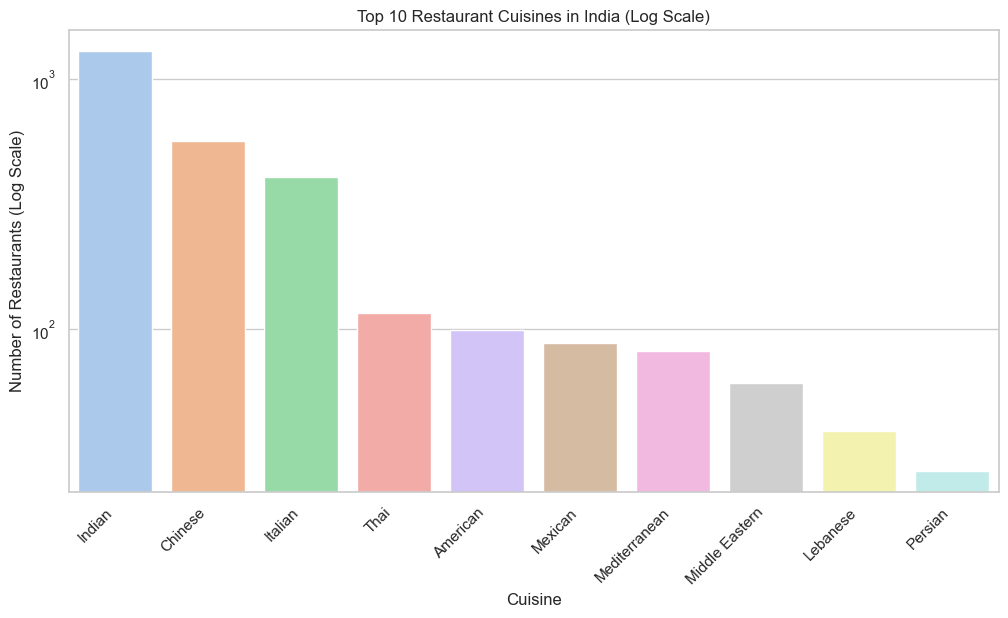

In [22]:
categories = ['Afghani', 'African', 'Arabic', 'Armenian', 'Azerbaijani', 'Balti', 'Brazilian', 'British', 'Burmese', 'Caribbean',
              'Chilean', 'Chinese', 'Eastern European', 'Egyptian', 'French', 'German', 'Greek', 'Indian', 'Indonesian', 'Irish',
              'Israeli', 'Jamaican', 'Korean', 'Latin', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Middle Eastern',
              'Mongolian', 'Moroccan', 'Nepalese', 'Pakistani', 'Persian', 'Peruvian', 'Philippine', 'Polynesian', 'Portuguese',
              'Singaporean', 'South American', 'Spanish', 'Sri Lankan', 'Thai', 'Tibetan', 'Turkish', 'Vietnamese', 'American',
              'Italian']

category_counts = [df_cuisines[category].sum() for category in categories]

# Create a DataFrame to hold the counts
top_cuisines_df = pd.DataFrame({'Cuisine': categories, 'Count': category_counts})

# Get the top 10 cuisines
top_10_cuisines = top_cuisines_df.nlargest(10, 'Count')

# Set a single shade of green
green_color = sns.color_palette("viridis", n_colors=1)[0]


# Create a bar graph with log scale and pastel colors
plt.figure(figsize=(12, 6))
pastel_colors = sns.color_palette("pastel", n_colors=10)  # Use pastel color palette
sns.barplot(x='Cuisine', y='Count', data=top_10_cuisines, palette=pastel_colors)
sns.set(style="whitegrid")  # Change the background style of the graph
plt.title('Top 10 Restaurant Cuisines in India (Log Scale)')
plt.ylabel('Number of Restaurants (Log Scale)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yscale('log')  # Add a logarithmic scale to the y-axis
plt.show()

<div dir="rtl">

#####  בגרף זה, אנו מראים את עשרת סוגי המטבח הפופולריים ביותר- סוגי המטבחים שבהם יש הכי הרבה מסעדות . 

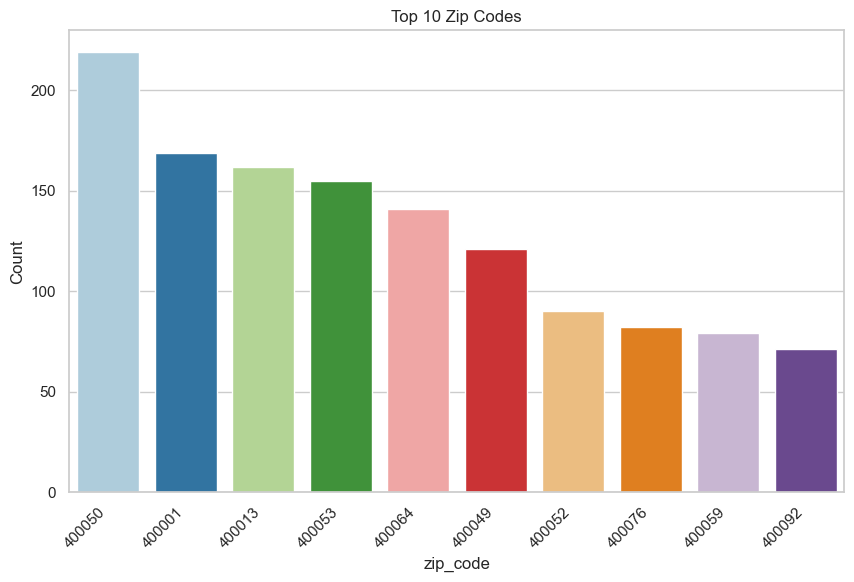

In [23]:
top_n_zip_codes = 10
top_zip_codes = df_cuisines['zip_code'].value_counts().nlargest(top_n_zip_codes)
plt.figure(figsize=(10, 6))
pastel_colors = sns.color_palette("pastel", n_colors=10)  # Use pastel color palette
sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values, palette='Paired')
plt.title('Top 10 Zip Codes')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


<div dir="rtl">

#####  בגרף זה, אנו מראים את עשרת המיקודים הפופולריים ביותר, הבנויים על פי כמות המסעדות המרבית בכל קטגורית מיקוד


<div dir="rtl">  

###   נבדוק את הצפיפויות של כל הביקורות לטובת סיווג קורולציות  :   

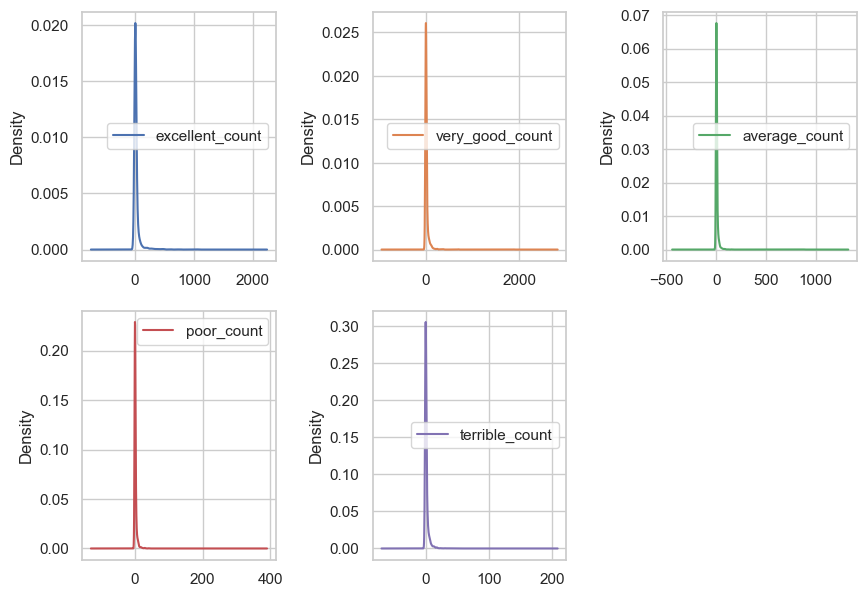

In [24]:

features = [ 'excellent_count', 'very_good_count', 'average_count', 'poor_count', 'terrible_count']

df_cuisines[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3, 3), figsize=(10,11))
plt.subplots_adjust(wspace = 0.5);
plt.legend("upper right")
plt.show()

<div dir="rtl">  

#### ניתן לראות שהצפיפות של הביקורות אינה בצורת פעמון (נורמלית) ולכן נשתמש בהמשך בקורלציה מסוג  "kendall" להסקת המסקנות   

<div dir="rtl">  
    
## מסקנה 1:
####  אנו מעוניינים לבדוק את הקשר בין סוגי המטבחים לבין סוגי הביקורות בעזרת קורלציה, על מנת לקבוע האם קיים קשר שיכול לשמש כמדד להצלחת פתיחת העסק.

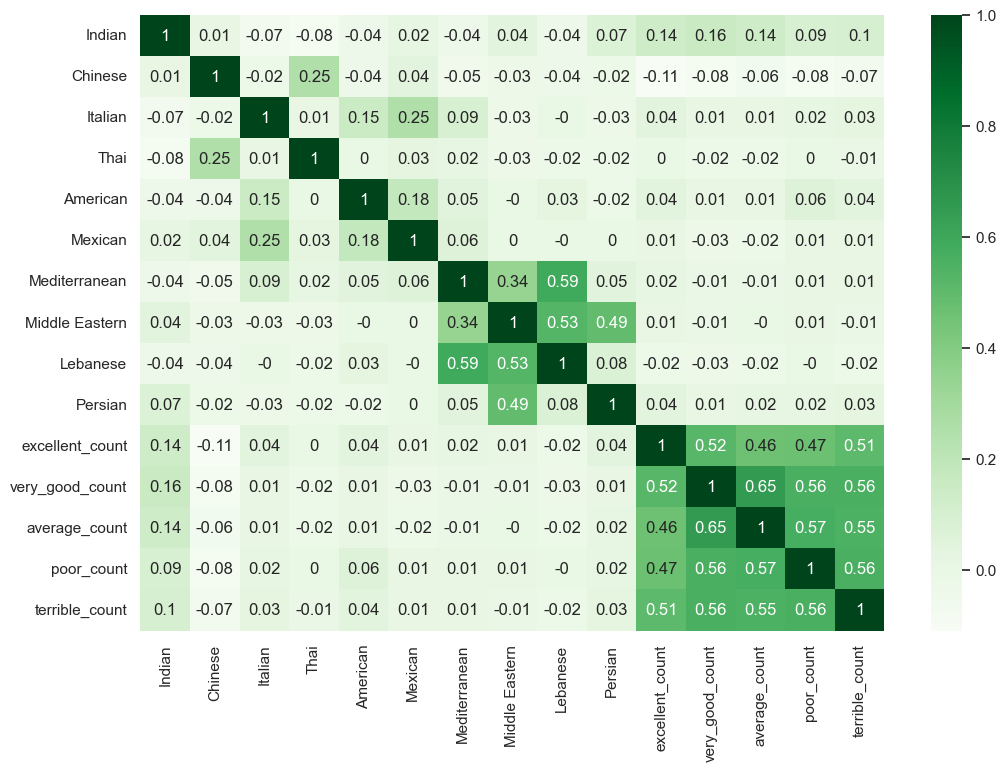

In [25]:
features1 = ["Indian", "Chinese", "Italian", "Thai", "American", "Mexican", "Mediterranean", "Middle Eastern", "Lebanese", "Persian"]
features2 = ['excellent_count', 'very_good_count', 'average_count', 'poor_count', 'terrible_count']


all_features = features1 + features2


selected_features_df = df_cuisines[all_features]


correlation_matrix = selected_features_df.corr(method="kendall").round(2)

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, cmap='Greens', annot=True)
plt.show()

<div dir="rtl"> 
    
#### נבחין בקורלציה נמוכה בין סוגי הביקורות לבין 10 סוגי מטבחים הכי פופלרים במומבאי לכן נבין שאין קשר ישיר בין דירוג מסויים לסגנון מטבח.
#### בתור בעלות עסק, נבין שהביקורות על המסעדות לא יהוו לי שיקול לסוג העסק שאפתח, בניגוד למה שחשבנו בניתוח הדאטה - שאם יש קשר בין טופ 10 סוגי מטבח לסוגי הביקורות אז היינו בוחרות את סוג המטבח הפופולרי לפי סוגי הביקורות.  
 

<div dir="rtl"> 

## מסקנה 2:
#### האם מסעדה שמציעה מספר סוגים של מטבחים תקבל דירוג גבוה יותר בהשוואה למסעדה שמתמקדת בסוג מטבח יחיד?

In [26]:
cuisine_columns =['Afghani', 'African', 'Arabic', 'Armenian', 'Azerbaijani', 'Balti', 'Brazilian', 'British', 'Burmese', 'Caribbean',
              'Chilean', 'Chinese', 'Eastern European', 'Egyptian', 'French', 'German', 'Greek', 'Indian', 'Indonesian', 'Irish',
              'Israeli', 'Jamaican', 'Korean', 'Latin', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Middle Eastern',
              'Mongolian', 'Moroccan', 'Nepalese', 'Pakistani', 'Persian', 'Peruvian', 'Philippine', 'Polynesian', 'Portuguese',
              'Singaporean', 'South American', 'Spanish', 'Sri Lankan', 'Thai', 'Tibetan', 'Turkish', 'Vietnamese', 'American',
              'Italian']

df_cuisines['cuisine_count'] = df_cuisines[cuisine_columns].sum(axis=1)

df_cuisines['groups'] = pd.cut(df_cuisines['cuisine_count'], bins=[0, 1, float('inf')], labels=['One kind', 'More than kind'])

single_cuisine_df = df_cuisines[df_cuisines['groups'] == 'One kind']
multiple_cuisines_df = df_cuisines[df_cuisines['groups'] == 'More than kind']


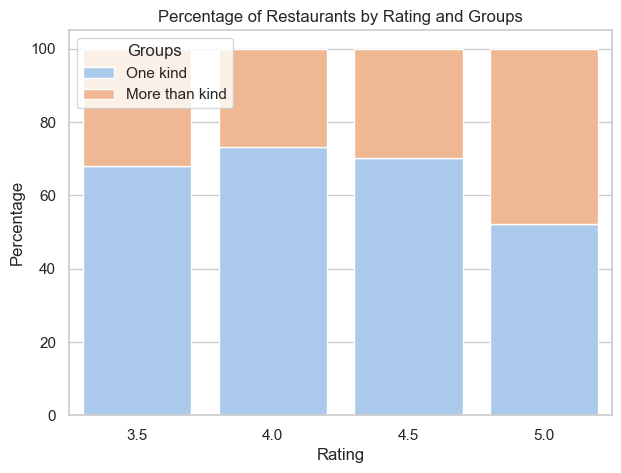

In [27]:
percentage_df = df_cuisines.groupby(['rating', 'groups']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

percentage_df = percentage_df.reset_index()


sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
ax = sns.barplot(x='rating', y='One kind', data=percentage_df, label='One kind', color=pastel_colors[0])
ax = sns.barplot(x='rating', y='More than kind', data=percentage_df, label='More than kind', color=pastel_colors[1], bottom=percentage_df['One kind'])
pastel_colors[0]
'More than kind'
plt.title('Percentage of Restaurants by Rating and Groups')
plt.xlabel('Rating')
plt.ylabel('Percentage')


plt.legend(title='Groups', loc='upper left')


plt.show()


<div dir="rtl"> 
    
#### לפי הנתונים המתקבלים מהגרף, ניתן להסיק כי מסעדות שמציעות סוג מטבח אחד מקבלות אחוזי רייטינג גבוהים יותר בכל רמת דירוג בהשוואה למסעדות שמציעות יותר מסוג אחד של מטבח.
#### בקשר למידע הזה, כבעל עסק ייתכן שיהיה יותר תועלת לך לפתוח מסעדה שמתמקדת בסוג מטבח אחד בלבד, מאשר לספק מגוון גדול של מטבחים.

<div dir="rtl"> 

## מסקנה 3:

### במסקנה זו, נבצע חיפוש לזיהוי המטבח הכי פופולרי לפי המיקוד הכי פופולרי :

In [28]:
subset_df = df_cuisines[df_cuisines['zip_code'].isin(['400050'])]

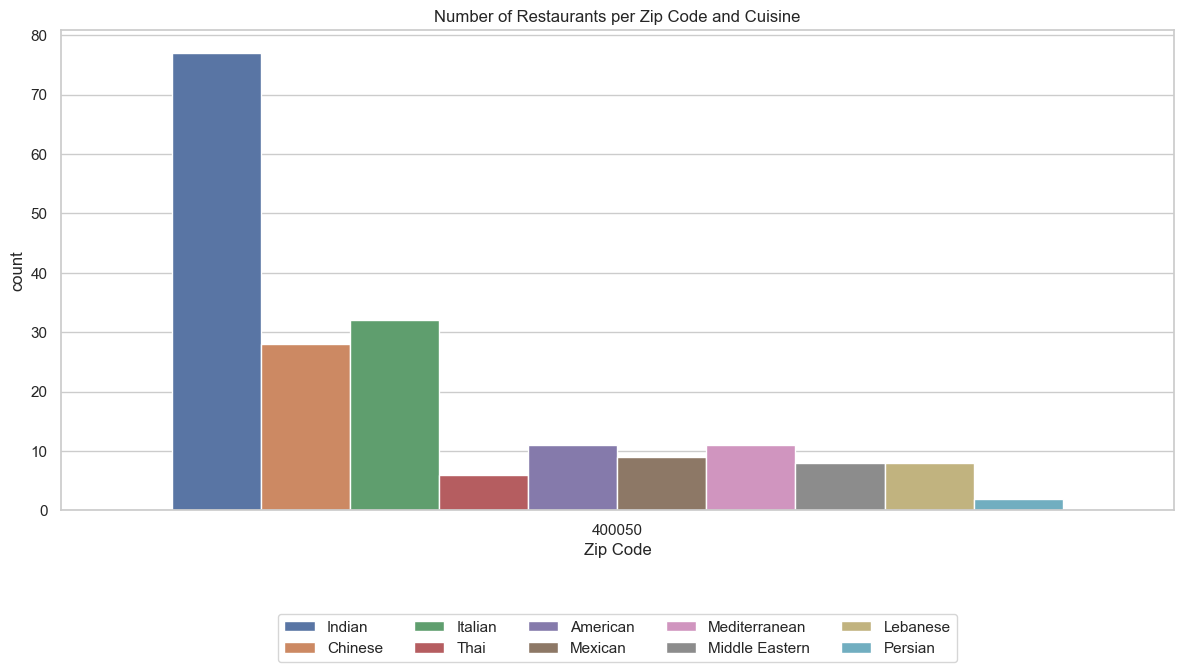

In [29]:
categories = ['Indian', 'Chinese', 'Italian', 'Thai', 'American', 'Mexican','Mediterranean', 'Middle Eastern', 'Lebanese', 'Persian']

subset_df_counts = pd.DataFrame(index=subset_df['zip_code'], columns=categories)

for category in categories:
    subset_df_counts[category] = subset_df[subset_df[category] == 1].groupby('zip_code').size()

subset_df_counts = subset_df_counts.reset_index()

subset_df_counts_melted = pd.melt(subset_df_counts, id_vars='zip_code', var_name='cuisine', value_name='count')
plt.figure(figsize=(12, 7))

bold_colors = sns.color_palette("deep", n_colors=len(subset_df_counts_melted['cuisine'].unique()))

ax = sns.barplot(x='zip_code', y='count', hue='cuisine', data=subset_df_counts_melted, errorbar=None, palette=bold_colors)

plt.title('Number of Restaurants per Zip Code and Cuisine')
plt.xlabel('Zip Code')

ax.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=5)
plt.tight_layout()

plt.show()


<div dir="rtl"> 
    
#### לפי מיפוי המיקודים הבחנו במיקוד שכמות המסעדות שהייתה בו הייתה הגדולה ביותר.
#### לאחר בדיקה בגוגל ראינו שהמיקוד :  400050 שייך לשכונה המהווה יעד פופולרי לכוכבי בוליווד . 
#### השכונה נחשבת לאיזור מפותח, מלא בנכסים,פאבים,בתי ספר,מכללות יוקרתיות.
#### נוכל להבין לאור המצוקה הכלכלית השוררת בהודו ובעיקר בערים צפופות כמו מומבאי. בשכונה(ברנדה מערב) הזו לא גרים מקומיים אלא אנשים שאוכלים הרבה בחוץ
####  לפי המסקנות שניתקלנו בהן, יש עדיפות ניכרת לפתוח מסעדה המתמקדת בסוג מטבח אחד בלבד. המסקנה הזו עומדת על רקע הגיוני - הקונספט של מסעדה המתעסקת בסוג מטבח אחד יכול למשוך קהל מסוים המחפש חוויית אכילה מסוימת ויודע מה לצפות. זאת בניגוד למסעדה המציעה מגוון של סוגי מטבחים, שעשוייה להפוך את החוויה לפחות אחידה וקשה יותר לקבוע מה ניתן לצפות.
#### המסקנה מציינת גם את ההסתמכות על המציאות המקומית, בהיעדר צורך להציע כמה סוגי מטבחים על מנת להפוך את המסעדה לפופולרית

#### כבעל עסק, ייתכן שיהיה משתלם לך לפתוח מסעדה המתמקדת במטבח ההודי, וכך לספק לקהל המקומי את הסוג המבוקש והפופולרי ביותר באזור


 

 [link to the data source](https://www.magicbricks.com/Bandra-West-in-Mumbai-Overview)

<div>
<img src="https://github.com/LiatHallal/T.A-project-/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%A2%D7%9C%20%D7%9E%D7%A1%D7%A7%D7%A0%D7%94%202.jpg?raw=true" width="700"/>
</div>

<div dir="rtl"> 

<div dir="rtl"> 

## מסקנה 4:
#### האם כבעל עסק כדאי לבחור בפתיחת מסעדה פרטית או להצטרף לרשת מסעדות? 

In [30]:
indian_restaurants = subset_df[subset_df['cuisines'] == 'Indian']



In [31]:
#בדיקה כמה מופעים(סניפים)יש בכל מסעדה   
indian_restaurants[['name']].value_counts()

name                              
AB Celestial                          1
And It Was Called Yellow              1
Vista Taj Lands End Mumbai            1
Tibbs Frankie                         1
The Burgery                           1
Taste of Punjab                       1
Shahi Durbar                          1
Sardaarji                             1
Masala Craft                          1
Masala Bay, Taj Lands End, Mumbai     1
Madras diaries                        1
Lucky Restaurant                      1
Kakori House                          1
Janata Lunch Home Restaurant & Bar    1
Hanglas Restaurant                    1
Copper Chimney                        1
Cheron                                1
Butter Chicken Factory                1
Balaji Restaurant                     1
bombay blues                          1
Name: count, dtype: int64

In [32]:
highest_review_count_row = indian_restaurants[indian_restaurants['review_count'] == indian_restaurants['review_count'].max()]

restaurant_name_highest_review_count = highest_review_count_row['name']

highest_review_count_row

,name,address,zip_code,Phone,cuisines,rating,review_count,excellent_count,very_good_count,average_count,...,Thai,Tibetan,Turkish,Vietnamese,American,Italian,Japanese,European,cuisine_count,groups
1599,"Masala Bay, Taj Lands End, Mumbai","Lobby Level Byramji Jeejeebhoy Road, Mumbai 40...",400050,+91 22 6668 1234,Indian,4.5,326.0,185.0,96.0,23.0,...,0,0,0,0,0,0,0,0,1,One kind


<div dir="rtl"> 

#### על פי הנתונים המופיעים, ניתן להסיק כי כדי להצליח בתחום המסעדנות, יש לבחור בהקמת מסעדת אוכל פרטית מסוג מטבח הודי באזור עם מיקוד 400050.נראה כי זהו אזור שמסעדות מסוג זה נהנות מקהל יעד ופופולריות גבוהה.

#### מתוך המסעדות באזור זה, מסעדת "Masala Bay, Taj Lands End, Mumbai" בעלת רייטינג גבוה (בין 4-5), וכמות גדולה של ביקורות מצויינות או טובות מאוד, המעידה על הצלחה ניכרת.

#### בנוסף,מתוך המסעדות הפרטיות שהצליחו וזכו לרייטינג גבוה וכמות ביקורות ניכרת ייתכן שיהיה משתלם לשקול פתיחת סניף נוסף של  "Masala Bay, Taj Lands End, Mumbai" , . זו אפשרות שיכולה להבטיח הצלחה מתמשכת,הגדלת רווחים, ומשיכת לקוחות מהאיזור  ולספק לך יתרון על פני עסקים יחידים. 